In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.features.cleaning import clean_data

In [6]:
dir_data = './data'
filename_data_brain = os.path.join(
    dir_data, 
    'survival_brain_2000_to_2020_seer_2022_db.csv'
)
data_raw = pd.read_csv(filename_data_brain)

/var/folders/x7/y98cqsdn699czxl0ksdv4x100000gn/T/ipykernel_8935/2315449442.py:6: DtypeWarning: Columns (219) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(filename_data_brain)


In [7]:
data = clean_data(data_raw)

/Users/ajy/GDrive/Work/Job Search/Erdos/Data Science Boot Camp (Spring 2024)/bootcamp-project/spring-2024-cancer-survival-known-success/src/features/cleaning.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return df.replace(replacements)


For an initial look, let's just define a list of some of the  columns that look interesting.

In [23]:
data.head(10)

,Age recode with <1 year olds,Sex,Year of diagnosis,PRCDA 2020,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)","Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",TNM 7/CS v0204+ Schema (thru 2017),AYA site recode 2020 Revision,ICCC site recode 3rd edition/IARC 2017,...,"Race recode (White, Black, Other, Unknown) - no total",Year of diagnosis (2000-2019 by 5),End Calc Vital Status (Adjusted),Number of Intervals (Calculated),Cumulative Expected (Calculated),Final Interval Expected (12 month),Final Interval Year (Calculated),"Age Standard for Survival (15-44,45-54,55-64,65-74,75+).1",Alive at last contact,Median household income inflation adj to 2021 (thousands USD)
0,15,Female,2000,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Brain,3.1.2.2 Glioblastoma - invasive,IIIb Astrocytomas,...,White,2000,Dead,23,0.9994,0.9997,2002,15-19 years,False,75
1,15,Male,2000,Not PRCDA,Black,Non-Spanish-Hispanic-Latino,Non-Hispanic Black,Brain,7.3 Germ cell and trophoblastic - CNS,Xa Intracranial and intraspinal germ cell tumors,...,Black,2000,Dead,1,0.9999,0.9986,2000,15-19 years,False,75
2,15,Male,2000,Not PRCDA,White,Spanish-Hispanic-Latino,Hispanic (All Races),Brain,3.1.2.2 Glioblastoma - invasive,IIIb Astrocytomas,...,White,2000,Dead,11,0.9993,0.9993,2001,15-19 years,False,75
3,15,Male,2000,Not PRCDA,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Non-Hispanic Asian or Pacific Islander,Brain,7.3 Germ cell and trophoblastic - CNS,Xa Intracranial and intraspinal germ cell tumors,...,"Other (American Indian/AK Native, Asian/Pacifi...",2000,Alive,60,0.9978,0.9995,2005,15-19 years,True,75
4,15,Male,2004,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Brain,3.1.2.2 Glioblastoma - invasive,IIIb Astrocytomas,...,White,2004,Dead,35,0.9976,0.9991,2007,15-19 years,False,75
5,15,Female,2001,Not PRCDA,White,Spanish-Hispanic-Latino,Hispanic (All Races),Brain,3.1.1.2 Oligodendroglioma - invasive,IIId Other gliomas,...,White,2001,Alive,60,0.9988,0.9997,2006,15-19 years,True,75
6,15,Male,2002,Not PRCDA,Black,Non-Spanish-Hispanic-Latino,Non-Hispanic Black,Brain,3.1.4.1 Pilocytic astrocytoma,IIIb Astrocytomas,...,Black,2002,Alive,60,0.9939,0.9984,2007,15-19 years,True,75
7,15,Male,2000,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Brain,3.1.1.2 Oligodendroglioma - invasive,IIId Other gliomas,...,White,2000,Untraced,26,0.9982,0.9991,2002,15-19 years,True,75
8,15,Male,2001,Not PRCDA,White,Spanish-Hispanic-Latino,Hispanic (All Races),Brain,7.3 Germ cell and trophoblastic - CNS,Xa Intracranial and intraspinal germ cell tumors,...,White,2001,Alive,60,0.9951,0.9989,2006,15-19 years,False,75
9,15,Male,2003,Not PRCDA,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Brain,3.1.2.2 Glioblastoma - invasive,IIIb Astrocytomas,...,White,2003,Alive,60,0.9951,0.9990,2008,15-19 years,False,75


In [8]:
categorical_columns = [
    'Sex',
    'Race recode (W, B, AI, API)', 
    'Origin recode NHIA (Hispanic, Non-Hisp)', 
    'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)', 
    'Vital status recode (study cutoff used)', 
    'SEER cause-specific death classification', 
    'SEER other cause of death classification', 
    'Type of Reporting Source', 
    'Marital status at diagnosis', 
    'Rural-Urban Continuum Code', 
    'End Calc Vital Status (Adjusted)', 
]
numerical_columns = [
    'Year of diagnosis', 
    'Year of follow-up recode', 
    'Total number of in situ/malignant tumors for patient', 
    'Year of diagnosis (2000-2019 by 5)', 
    'Survival months'
]
other_useful_columns = [
    'Alive at last contact', 
    'Year of death recode', 
    'Age recode with <1 year olds', 
    'Median household income inflation adj to 2021 (thousands USD)'
]
all_useful_columns = categorical_columns + numerical_columns + other_useful_columns
data = data.astype({col: 'category' for col in categorical_columns})

In [9]:
# Make a smaller dataframe for testing
d = data[all_useful_columns]

In [10]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80960 entries, 0 to 80959
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Sex                                                            80960 non-null  category
 1   Race recode (W, B, AI, API)                                    80960 non-null  category
 2   Origin recode NHIA (Hispanic, Non-Hisp)                        80960 non-null  category
 3   Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)     80960 non-null  category
 4   Vital status recode (study cutoff used)                        80960 non-null  category
 5   SEER cause-specific death classification                       80960 non-null  category
 6   SEER other cause of death classification                       80960 non-null  category
 7   Type of Reporting Source                         

## Exploratory Data Analysis

In [24]:
d.head(10)

,Sex,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)","Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Vital status recode (study cutoff used),SEER cause-specific death classification,SEER other cause of death classification,Type of Reporting Source,Marital status at diagnosis,Rural-Urban Continuum Code,End Calc Vital Status (Adjusted),Year of diagnosis,Year of follow-up recode,Total number of in situ/malignant tumors for patient,Year of diagnosis (2000-2019 by 5),Survival months,Alive at last contact,Year of death recode,Age recode with <1 year olds,Median household income inflation adj to 2021 (thousands USD)
0,Female,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Dead,Dead (attributable to this cancer dx),Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Dead,2000,2002,1,2000,22,False,2002,15,75
1,Male,Black,Non-Spanish-Hispanic-Latino,Non-Hispanic Black,Dead,Dead (attributable to this cancer dx),Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Dead,2000,2000,1,2000,0,False,2000,15,75
2,Male,White,Spanish-Hispanic-Latino,Hispanic (All Races),Dead,Dead (missing/unknown COD),Dead (missing/unknown COD),Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Dead,2000,2001,1,2000,10,False,2001,15,75
3,Male,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Non-Hispanic Asian or Pacific Islander,Alive,Alive or dead of other cause,Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Alive,2000,2020,1,2000,244,True,<NA>,15,75
4,Male,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Dead,Dead (attributable to this cancer dx),Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Dead,2004,2007,1,2004,34,False,2007,15,75
5,Female,White,Spanish-Hispanic-Latino,Hispanic (All Races),Alive,Alive or dead of other cause,Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Alive,2001,2020,1,2001,230,True,<NA>,15,75
6,Male,Black,Non-Spanish-Hispanic-Latino,Non-Hispanic Black,Alive,Alive or dead of other cause,Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Alive,2002,2020,1,2002,225,True,<NA>,15,75
7,Male,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Alive,Alive or dead of other cause,Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Untraced,2000,2002,1,2000,25,True,<NA>,15,75
8,Male,White,Spanish-Hispanic-Latino,Hispanic (All Races),Dead,Alive or dead of other cause,Dead (attributable to causes other than this c...,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Alive,2001,2013,1,2001,136,False,2013,15,75
9,Male,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Dead,Dead (attributable to this cancer dx),Alive or dead due to cancer,Hospital inpatient/outpatient or clinic,Single (never married),Counties in metropolitan areas ge 1 million pop,Alive,2003,2009,1,2003,70,False,2009,15,75


### Data Visualization

We want to get a rough idea of the distributions within the data. This initial look should be fairly cursory, since we haven't even done the train-test split yet.

Below are several quick summary plots of some of the most important features.

In [12]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels)

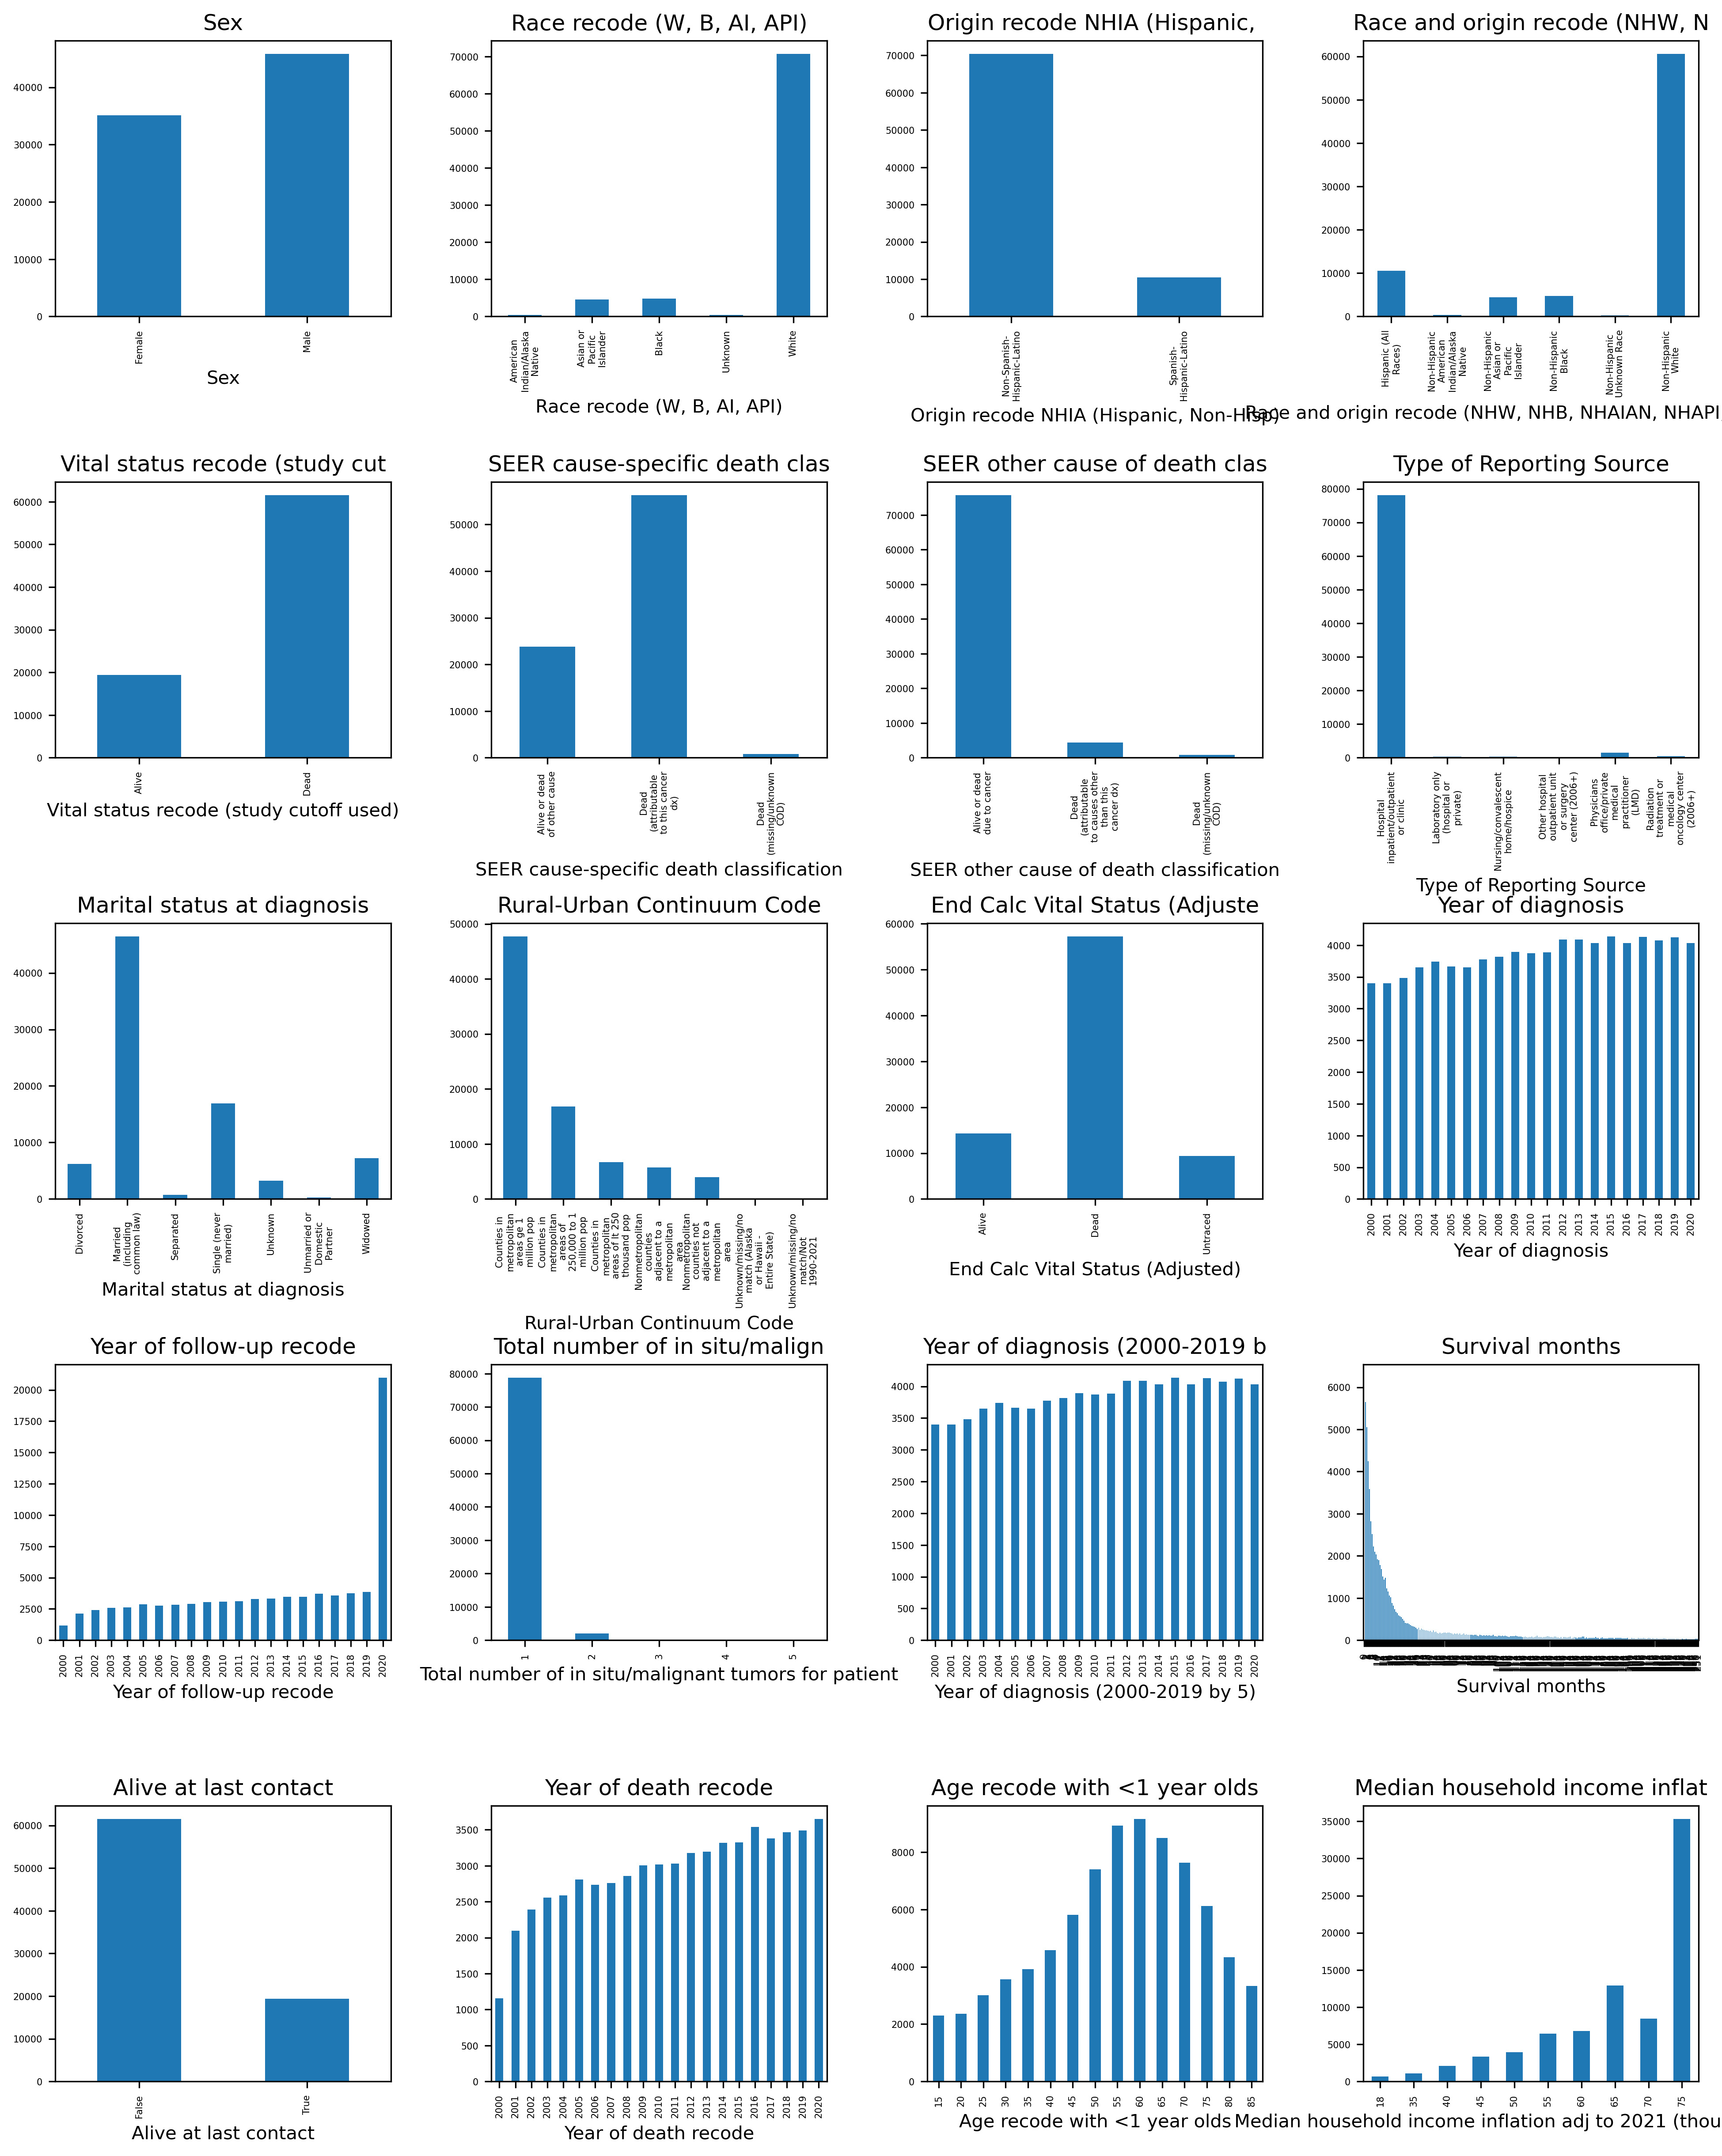

In [13]:
fig, axes = plt.subplots(5, 4, figsize=(16,20), dpi=300)
for col, ax in zip(d, axes.ravel()):
    d[col].value_counts().sort_index().plot.bar(ax=ax, title=col[:30])
    wrap_labels(ax, 15)
    ax.tick_params(axis='both', which='major', labelsize=5)
fig.subplots_adjust(wspace=0.3, hspace=0.6)

In [14]:
import seaborn as sns
sns.set_theme(rc={"figure.dpi": 100})

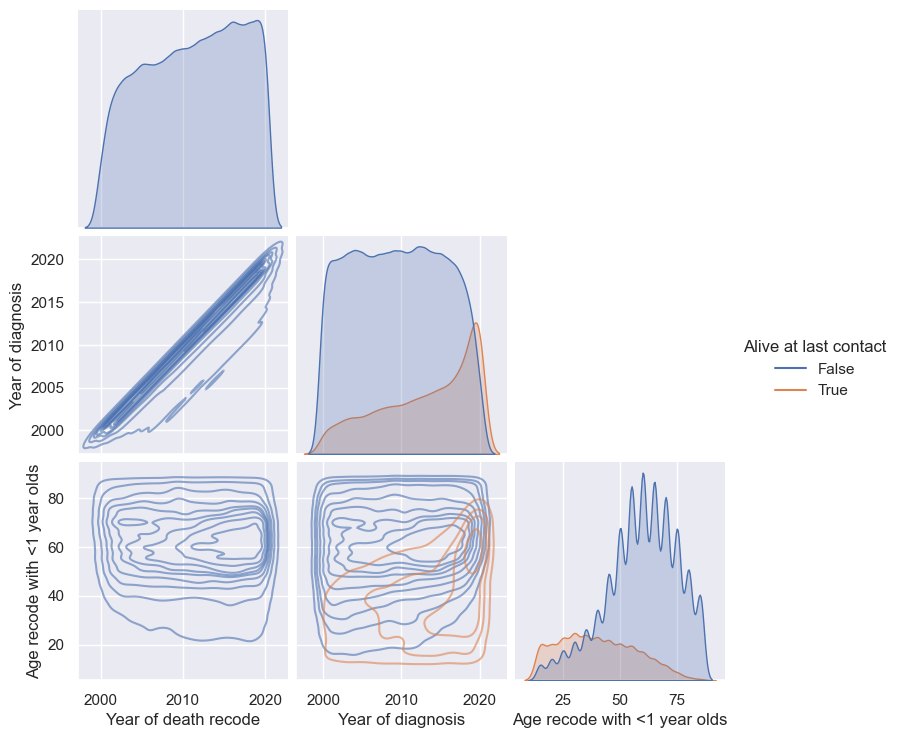

In [15]:
c = [
    'Year of death recode', 
    'Year of diagnosis', 
    'Age recode with <1 year olds', 
    # 'Sex', 
    # 'Race recode (W, B, AI, API)', 
    # 'Total number of in situ/malignant tumors for patient', 
    # # 'Alive at last contact', 
    # 'Median household income inflation adj to 2021 (thousands USD)'
]
sns.pairplot(
    data=d,
    x_vars=c,
    y_vars=c,
    hue='Alive at last contact',
    plot_kws={'alpha': 0.6},
    kind='kde',
    corner=True
)

array([[<Axes: title={'center': 'Age recode with <1 year olds'}>]],
      dtype=object)

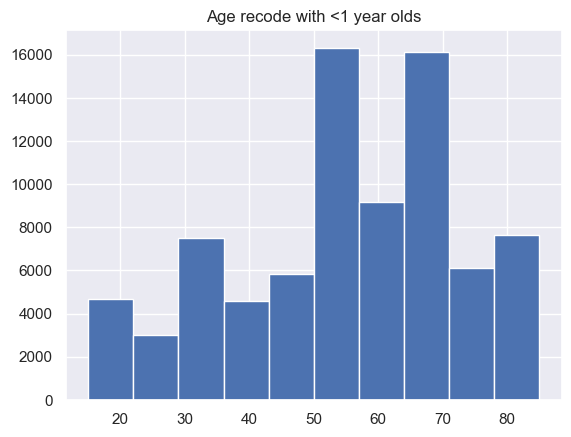

In [25]:
data.hist(['Age recode with <1 year olds'])

<Axes: xlabel='Age recode with <1 year olds', ylabel='Survival months'>

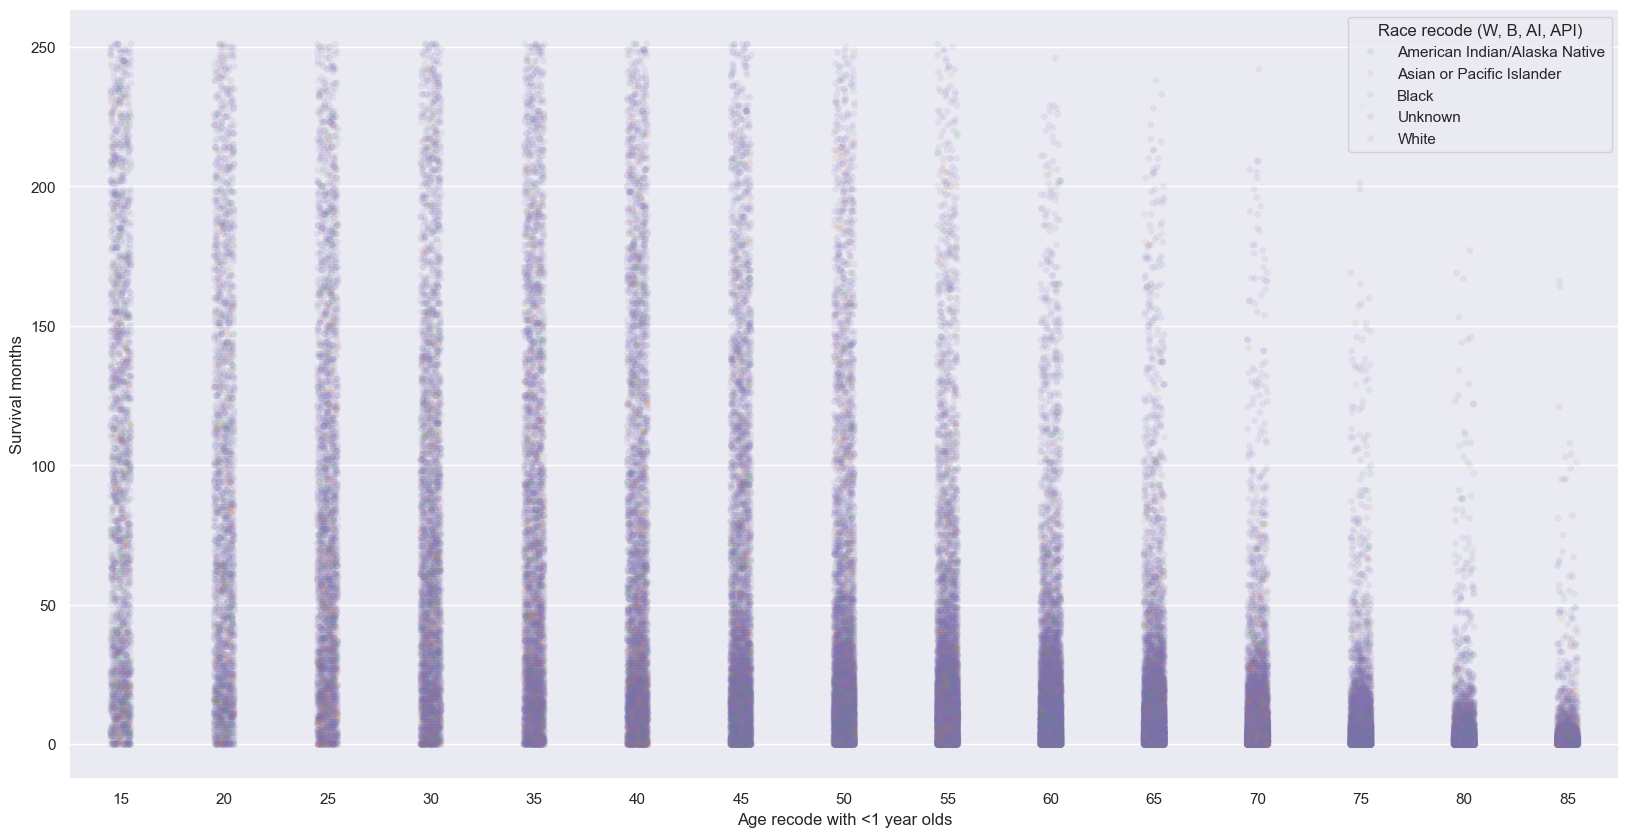

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
    ax=ax,
    data=d,
    x='Age recode with <1 year olds',
    y='Survival months',
    hue='Race recode (W, B, AI, API)',
    alpha=0.1
)

Since we can't see a whole lot here, let's make a plot for each age range.

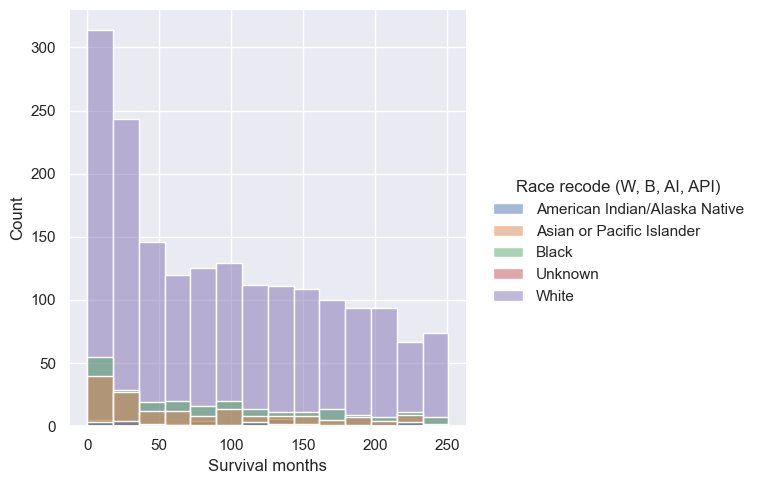

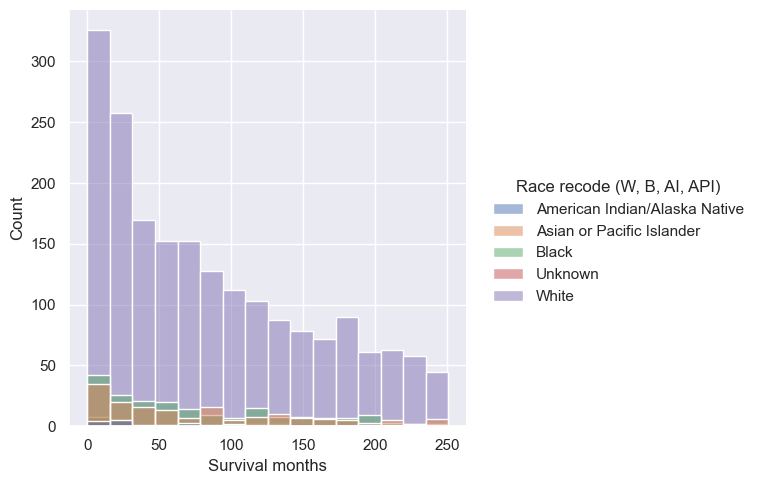

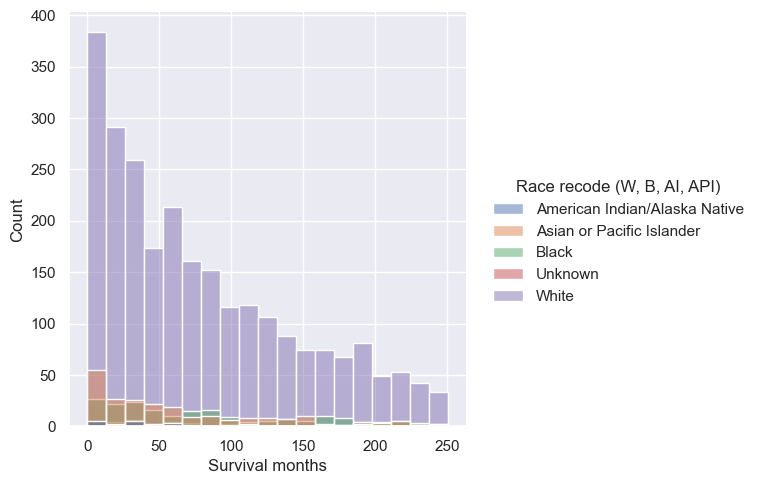

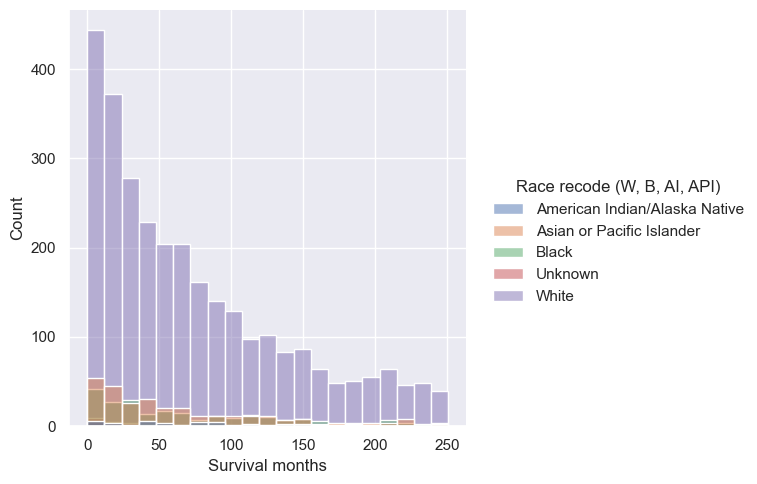

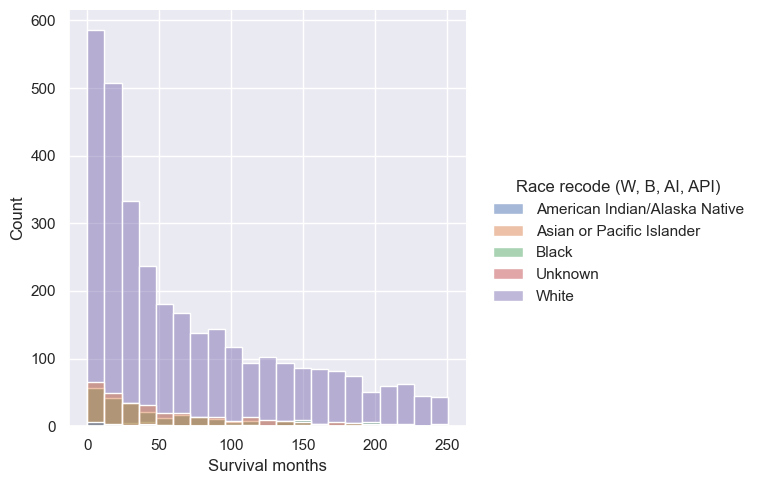

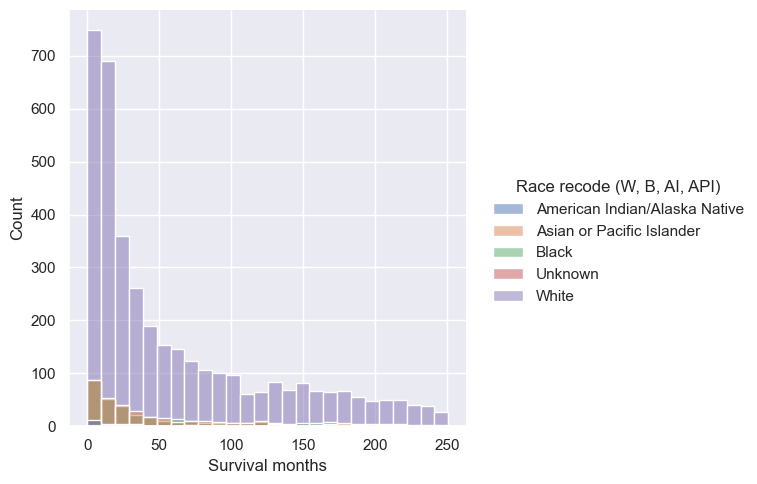

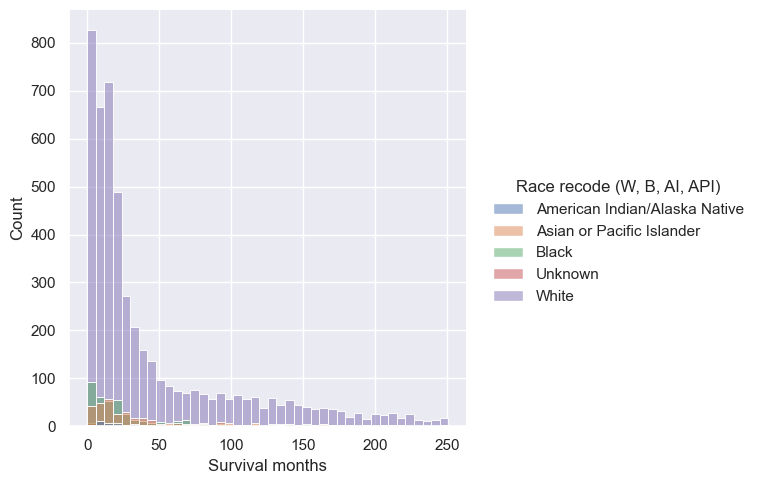

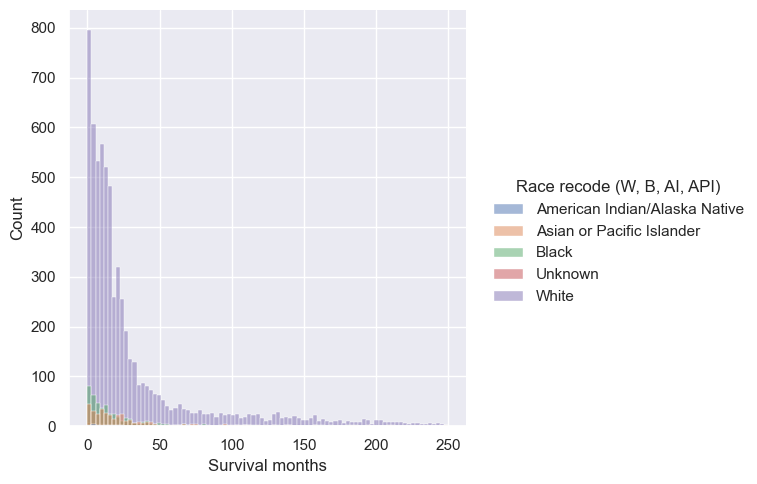

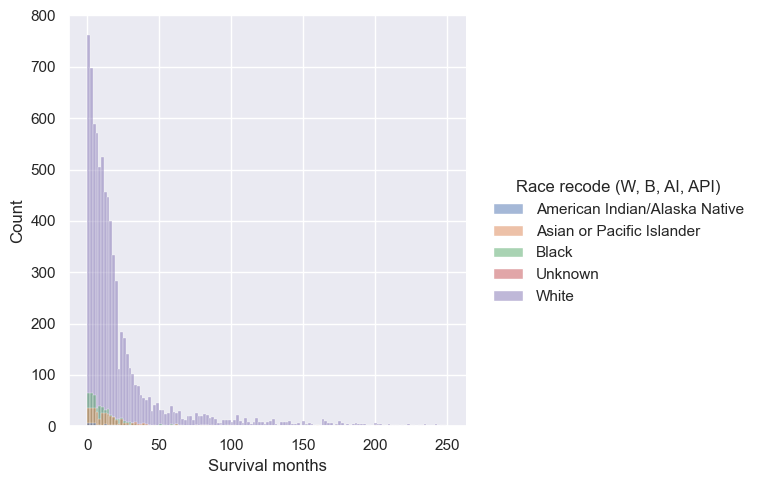

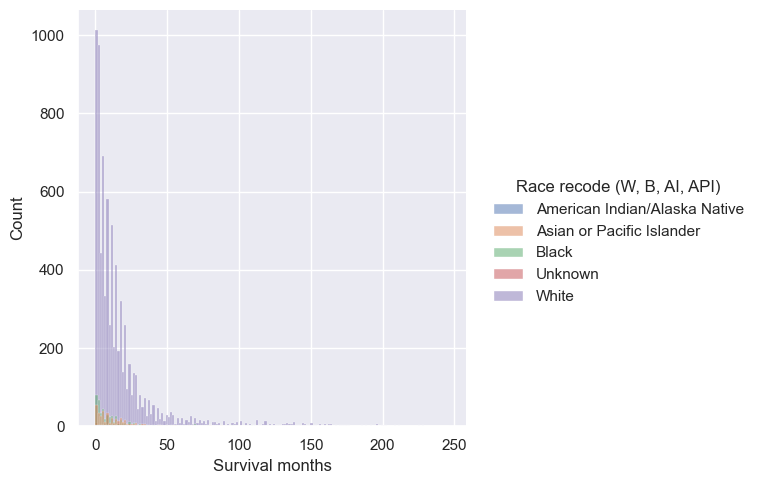

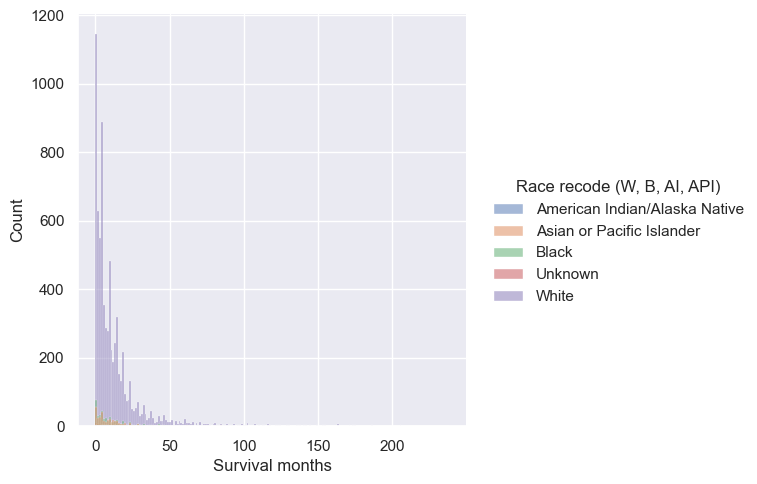

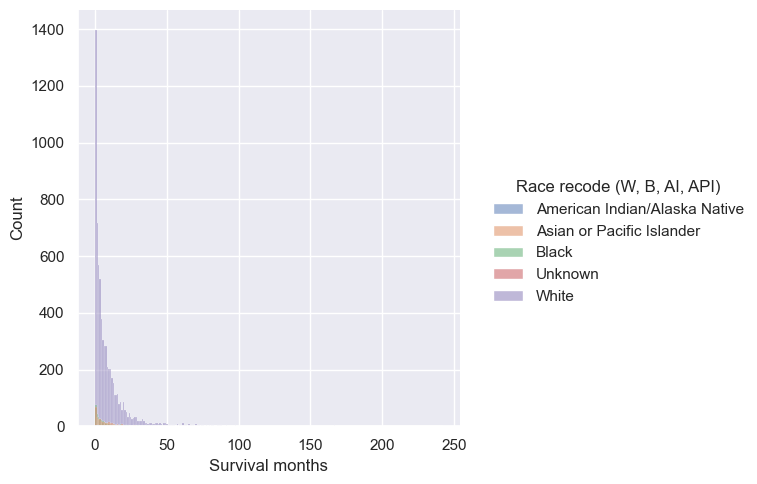

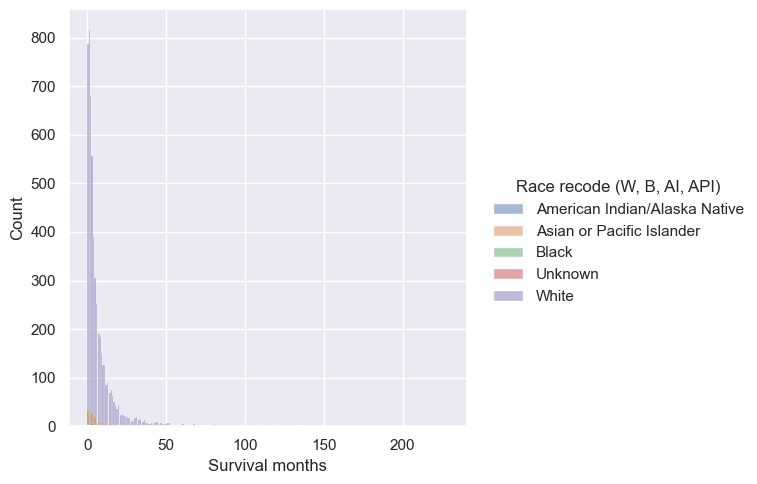

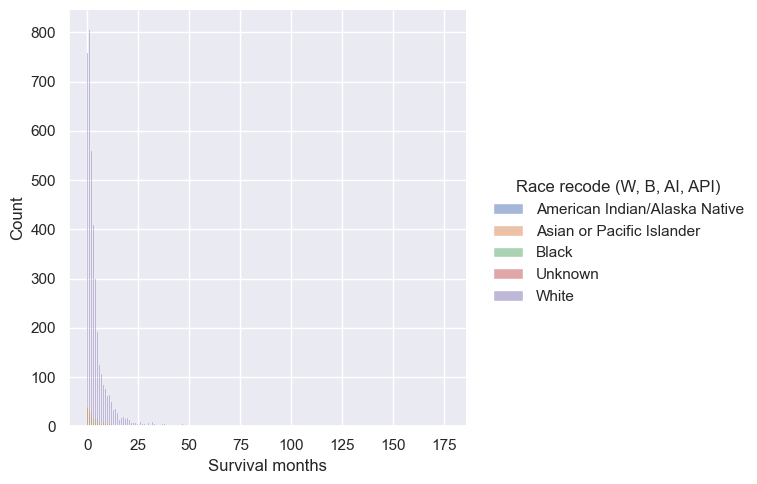

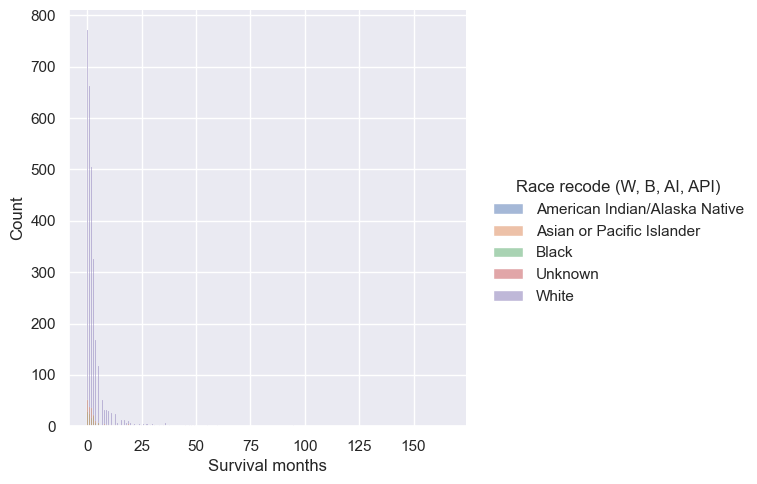

In [31]:
for age in sorted(d['Age recode with <1 year olds'].unique()):
    dd = d[d['Age recode with <1 year olds'] == age]
    sns.displot(data=dd, x='Survival months', hue='Race recode (W, B, AI, API)', kind='hist')